# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Evinda Apriliani
- **Email:** evinda241@gmail.com
- **ID Dicoding:** kusukabiru

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda oleh **pengguna terdaftar per hari** selama bulan **Januari sampai Mei** pada tahun **2012**?
- Pada **musim** apa **paling banyak** dan **paling sedikit** sepeda disewa **per jam** di tahun **2011**?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Memuat data hour_df**

In [2]:
hour_df = pd.read_csv("./data/hour.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Memuat data day_df**

In [3]:
day_df = pd.read_csv("./data/day.csv", delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Kedua data ini berisi data jumlah sepeda yang disewakan setiap jam dan setiap harinya.
- Data ini dikumpulkan dari tahun 2011 hingga 2012 dan selama 4 musim.
- Dengan nilai kolom `yr = 0` mewakili tahun `2011` dan `yr = 1` mewakili tahun `2012`.
- Dengan setiap nilai pada kolom `season` mewakili musim tertentu yaitu `1:spring`, `2:summer`, `3:fall`, `4:winter`.
- Terdapat kolom yang menjelaskan kapan sepeda disewa dan saat kondisi apa (`holiday`, `weekday`, `workingday`).
- Terdapat kolom yang menjelaskan kondisi suhu, kelembapan, dan kecepatan angin.
- Terdapat kolom yang memberi penjelasan jumlah penyewaan oleh pengguna terdaftar dan kasual (`registered`, `casual`), serta total keduanya (`cnt`).


### Assessing Data

**Memeriksa tipe data pada hour_df**

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Memastikan tidak ada missing value pada hour_df**

In [5]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Mengidentifikasi duplicate value dan memeriksa parameter statistik pada hour_df**

In [6]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Memeriksa tipe data pada day_df**

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Memastikan tidak ada missing value pada day_df**

In [8]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Mengidentifikasi duplicate value dan memeriksa parameter statistik pada day_df**

In [9]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Kolom `dteday` seharusnya direpresentasikan sebagai tipe data `datetime`, bukan `object`.
- Tidak ada missing value pada kedua data tersebut.
- Tidak ada duplicate value pada kedua data tersebut.
- Tidak terdapat keanehan yang ditemukan dalam ringkasan parameter statistik dari kedua data tersebut.

### Cleaning Data

#### Mengganti Tipe Data

**Mengganti tipe data pada kolom dteday menjadi datetime**

In [10]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

**Memeriksa perubahan tipe data dteday pada hour_df**

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Memeriksa perubahan tipe data dteday pada day_df**

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

- Seperti yang ditemukan pada proses Assessing Data, maka pada proses Cleaning Data dilakukan perubahan tipe data pada kolom dteday menjadi datetime.

## Exploratory Data Analysis (EDA)

### Explore day_df

In [13]:
day_df.instant.is_unique

True

In [14]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
112,113,2011-04-23,2,0,4,0,6,0,2,0.460000,0.450121,0.887917,0.230725,1462,2574,4036
171,172,2011-06-21,3,0,6,0,2,1,2,0.680833,0.637646,0.770417,0.171025,774,4061,4835
577,578,2012-07-31,3,1,7,0,2,1,1,0.713333,0.662896,0.704167,0.165425,968,6248,7216
619,620,2012-09-11,3,1,9,0,2,1,1,0.577500,0.554292,0.520000,0.092054,1070,6697,7767
694,695,2012-11-25,4,1,11,0,0,0,1,0.245833,0.257583,0.468333,0.150500,309,2115,2424


**Memeriksa distribusi data**

array([[<Axes: title={'center': 'mnth'}>,
        <Axes: title={'center': 'registered'}>]], dtype=object)

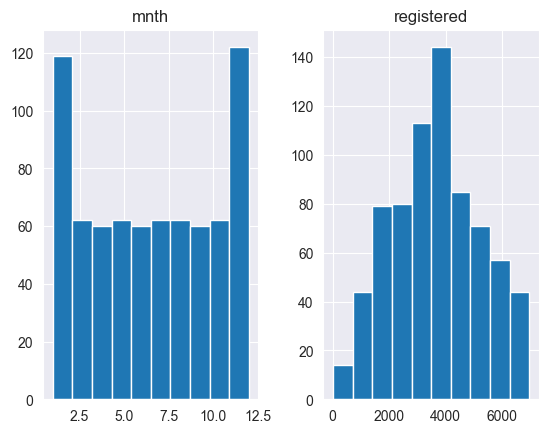

In [15]:
day_col = ["mnth", "registered"]
day_df.hist(day_col)

Distribusi pada "mnth" menunjukkan bahwa pada bulan-bulan tertentu, terjadi peningkatan penyewaan sepeda, bisa jadi dikarenakan liburan dan sebagainya. Distribusi pada "registered" sudah hampir mendekati distribusi normal.

**Memeriksa korelasi antar data**

In [16]:
day_df[day_col].corr()

,mnth,registered
mnth,1.000000,0.293488
registered,0.293488,1.000000


Korelasi antara "mnth" dan "registered" tidak terlalu kuat, tetapi ada kecenderungan bahwa keduanya bergerak searah.

**Mengelompokkan Data**

In [17]:
day_df[(day_df["yr"] == 1) & (day_df["mnth"] >= 1) & (day_df["mnth"] <= 5)].groupby(by=["mnth"]).agg({
    "registered": ["sum"]
})

,registered
,sum
mnth,
1,87775
2,94416
3,133257
4,135768
5,151630


- Melakukan filtering `yr = 1` untuk tahun 2012 dan `mnth >= 1 AND <= 5` untuk bulan Januari sampai Mei.
- Pivot table dibuat dengan dikelompokkan berdasarkan `mnth`.
- Menghitung total penyewaan sepeda oleh pengguna terdaftar dengan menggunakan fungsi `sum` pada kolom `registered`.

### Explore hour_df

In [18]:
hour_df.instant.is_unique

True

In [19]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
19,20,2011-01-01,1,0,1,19,0,6,0,3,0.42,0.4242,0.88,0.2537,6,31,37
862,863,2011-02-08,1,0,2,9,0,2,1,1,0.24,0.1970,0.52,0.4925,7,128,135
736,737,2011-02-03,1,0,2,1,0,4,1,1,0.20,0.1515,0.44,0.5224,0,5,5
11009,11010,2012-04-08,2,1,4,21,0,0,0,1,0.52,0.5000,0.34,0.2239,53,77,130
5923,5924,2011-09-09,3,0,9,8,0,5,1,3,0.62,0.5455,0.94,0.1642,12,276,288


**Melihat distribusi data**

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

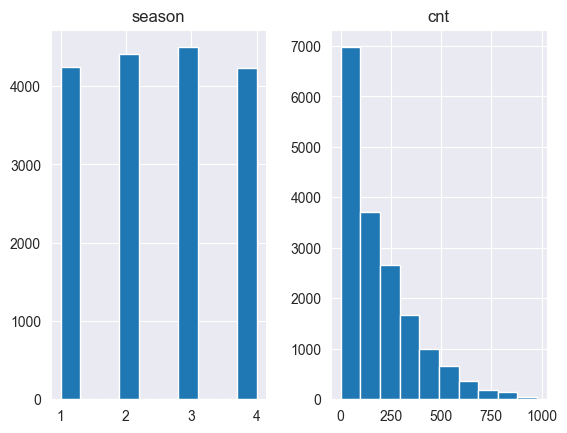

In [20]:
hour_col = ["season", "cnt"]
hour_df.hist(hour_col)

Distribusi pada "season" menunjukkan bahwa data memiliki distribusi yang relatif seimbang antar musim. Distribusi pada "cnt" sangat skewed ke kanan

**Melihat korelasi antar data**

In [21]:
hour_df[hour_col].corr()

,season,cnt
season,1.000000,0.178056
cnt,0.178056,1.000000


Korelasi antara "season" dan "cnt" sangat lemah, tetapi ada kecenderungan bahwa keduanya bergerak searah.

**Mengelompokkan data**

In [22]:
# Penyewaan sepeda per jam di tahun 2011 berdasarkan musimnya
hour_df[hour_df["yr"] == 0].groupby(by=["season"]).agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,cnt
season,
3,419650
2,347316
4,326137
1,150000


- Melakukan filtering `yr = 0` untuk tahun 2011.
- Pivot table dibuat dengan dikelompokkan berdasarkan `season`.
- Menghitung total penyewaan sepeda secara keseluruhan dengan menggunakan fungsi `sum` pada kolom `cnt`.

### Explore all_df

# Menggabungkan hour_df dan day_df

In [23]:
all_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
all_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6.0,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.0,0.0,2.0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,1.0,1.0,1.0,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,2.0,1.0,1.0,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,3.0,1.0,1.0,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


# Mengelompokkan data

In [24]:
all_df[(all_df["yr_x"] == 1) & (all_df["mnth_x"] >= 1) & (all_df["mnth_x"] <= 5)].groupby(by=["mnth_x"]).agg({
    "registered_x": ["sum"]
})

,registered_x
,sum
mnth_x,
1,87775
2,94416
3,133257
4,135768
5,151630


# Mengelompokkan data

In [25]:
all_df[all_df["yr_x"] == 0].groupby(by=["season_x"]).agg({
    "cnt_x": "sum"
}).sort_values(by="cnt_x", ascending=False)

,cnt_x
season_x,
3,419650
2,347316
4,326137
1,150000


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan sepeda oleh pengguna terdaftar per hari selama bulan Januari sampai Mei pada tahun 2012?

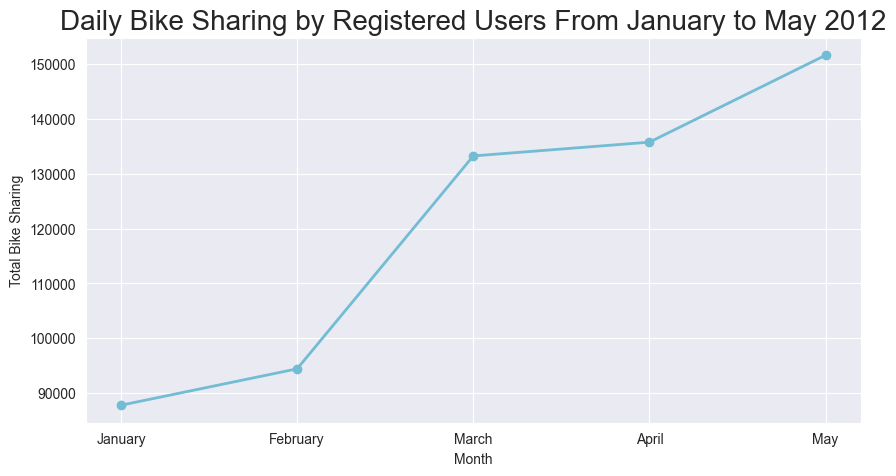

In [26]:
# Menyimpan dataframe yang sudah di-filter ke dalam monthly_sharing_df
monthly_sharing_df = all_df[(all_df["yr_x"] == 1) & (all_df["mnth_x"] >= 1) & (all_df["mnth_x"] <= 5)].groupby(by=["mnth_x"]).agg({
    "registered_x": ["sum"]
})
monthly_sharing_df.rename(columns={"registered_x": "total"}, inplace=True)
monthly_sharing_df = monthly_sharing_df.reset_index()

# Melakukan mapping untuk mengganti nilai kolom "mnth_x" menjadi nama bulannya
monthly_sharing_df["mnth_x"] = monthly_sharing_df["mnth_x"].map({1: "January", 2: "February", 3: "March", 4: "April", 5: "May"})

# Membuat plot dan line chart
plt.figure(figsize=(10, 5))
plt.plot(monthly_sharing_df["mnth_x"], monthly_sharing_df["total"], marker="o", linewidth=2, color="#72BCD4")
plt.title("Daily Bike Sharing by Registered Users From January to May 2012", loc="center", fontsize=20)
plt.xlabel("Month")
plt.ylabel("Total Bike Sharing")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Pada musim apa paling banyak dan paling sedikit sepeda disewa per jam di tahun 2011?

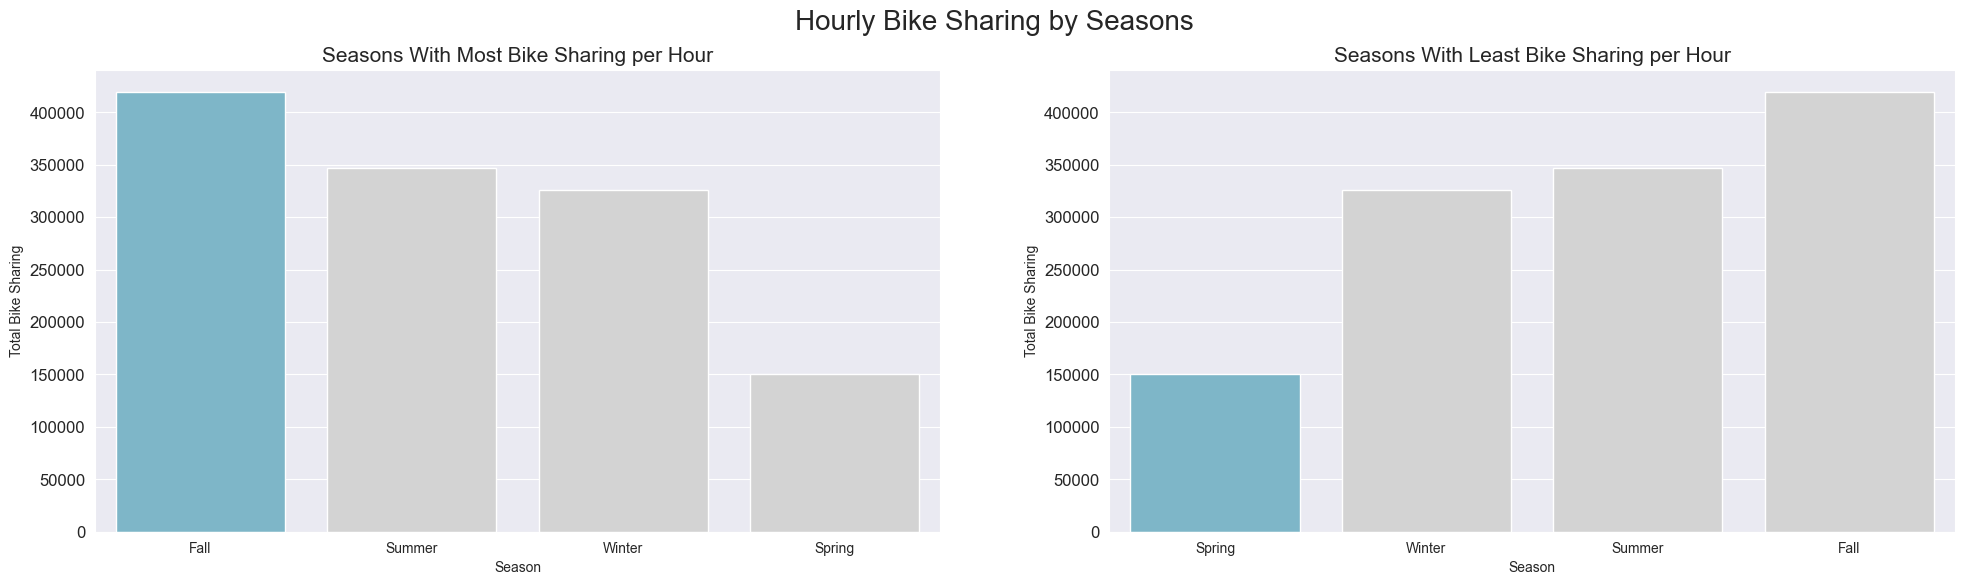

In [27]:
# Menyimpan dataframe yang sudah di-filter ke dalam seasons_sharing_df
seasons_sharing_df = all_df[all_df["yr_x"] == 0].groupby(by=["season_x"]).agg({
    "cnt_x": "sum"
}).sort_values(by="cnt_x", ascending=False)
seasons_sharing_df.rename(columns={"cnt_x": "total_sharing"}, inplace=True)

# Melakukan reset index pada dataframe
seasons_sharing_df = seasons_sharing_df.reset_index(drop=False)

# Melakukan mapping untuk mengganti nilai kolom "season_x" menjadi nama musimnya
seasons_sharing_df["season_x"] = seasons_sharing_df["season_x"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})

# Membuat figure untuk bar chart
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Mengatur warna bar chart
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Membuat bar chart untuk Musim Dengan Penyewaan Sepeda Perjam Paling Banyak
sns.barplot(x="season_x", y="total_sharing", data=seasons_sharing_df, palette=colors, ax=ax[0], hue="season_x")
ax[0].set_ylabel("Total Bike Sharing")
ax[0].set_xlabel("Season")
ax[0].set_title("Seasons With Most Bike Sharing per Hour", loc="center", fontsize=15)
ax[0].tick_params(axis ="y", labelsize=12)

# Membuat bar chart untuk Musim Dengan Penyewaan Sepeda Perjam Paling Sedikit
sns.barplot(x="season_x", y="total_sharing", data=seasons_sharing_df.sort_values(by="total_sharing", ascending=True), palette=colors, ax=ax[1], hue="season_x")
ax[1].set_ylabel("Total Bike Sharing")
ax[1].set_xlabel("Season")
ax[1].set_title("Seasons With Least Bike Sharing per Hour", loc="center", fontsize=15)
ax[1].tick_params(axis ="y", labelsize=12)

plt.suptitle("Hourly Bike Sharing by Seasons", fontsize=20)
plt.show()

**Insight:**
- Menggunakan line chart untuk menampilkan Performa Penyewaan Sepeda Oleh Pengguna Terdaftar Per Hari Selama Januari Sampai Mei di Tahun 2012.
- Menggunakan bar chart untuk menampilkan Penyewaan Sepeda Per Jam Berdasarkan Musim, serta untuk membandingkan yang paling banyak dan paling sedikit.

## Analisis Lanjutan (Opsional)

      category                                           hr
0   Peak Hours  7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20
1  Quiet Hours      0, 1, 2, 3, 4, 5, 6, 10, 11, 21, 22, 23


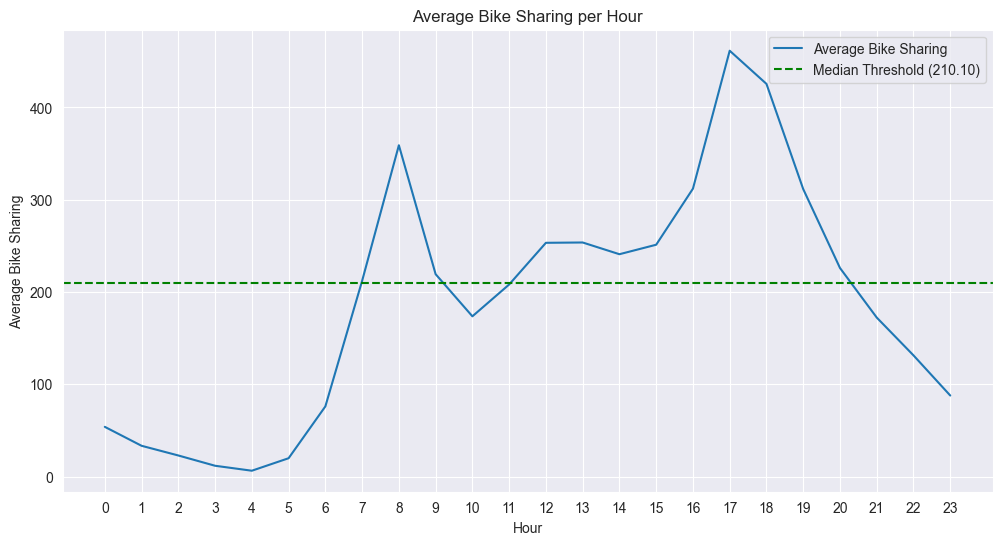

In [28]:
# Melakukan analisis lanjutan dengan clustering secara manual grouping: mengelompokkan jam sibuk dan jam tenang
avg_per_hour = all_df.groupby("hr")["cnt_x"].mean().reset_index()

# Menentukan threshold menggunakan median
threshold = avg_per_hour["cnt_x"].median()

# Menambahkan kolom baru "category" untuk mengelompokkan jam sibuk dan jam tenang
avg_per_hour["category"] = avg_per_hour["cnt_x"].apply(lambda x: "Peak Hours" if x > threshold else "Quiet Hours")

# Menyimpan hasil pengelompokkan ke dalam jam_sibuk dan jam_tenang
jam_sibuk = avg_per_hour[avg_per_hour["category"] == "Peak Hours"]
jam_tenang = avg_per_hour[avg_per_hour["category"] == "Quiet Hours"]

# Menyimpan data jamnya ke dalam avg_per_hour_grouped
avg_per_hour_grouped = avg_per_hour.groupby("category")["hr"].apply(lambda x: ', '.join(map(str, x))).reset_index()

# Menampilkan tabel
print(avg_per_hour_grouped)

# Visualisasi data
plt.figure(figsize=(12, 6))
plt.plot(avg_per_hour["hr"], avg_per_hour["cnt_x"], label="Average Bike Sharing")
plt.axhline(y=threshold, color="g", linestyle="--", label=f"Median Threshold ({threshold:.2f})")
plt.xticks(range(0, 24, 1))
plt.xlabel("Hour")
plt.ylabel("Average Bike Sharing")
plt.title("Average Bike Sharing per Hour")
plt.legend()
plt.show()

**Insight:**
- Mengelompokkan jam sibuk dan jam tenang dengan teknik analisis lanjutan clustering secara manual grouping.
- Visualisasi data sebagai gambaran pola penyewaan per jam dan menunjukkan sebaran jam sibuk dan jam tenang.
- Berdasarkan hasil klustering, didapatkan data jam sibuk dan jam tenang.

## Conclusion

**Bagaimana performa penyewaan sepeda yang terdaftar per hari selama bulan Januari sampai Mei pada tahun 2012?**
- Didapatkan hasil, bahwa performa penyewaan sepeda selama bulan Januari sampai Mei pada tahun 2012 terus mengalami peningkatan yang signifikan.
- Peningkatan yang terjadi dari 87775 ke 151630, jumlah yang sangat besar jika dalam hitungan bulan.

**Pada musim apa paling banyak dan paling sedikit sepeda disewa per jam di tahun 2011?**
- Didapatkan hasil, bahwa pada musim gugur (Fall) menjadi musim dimana paling banyak sepeda disewa per jamnya yaitu dengan total 419650 penyewaan per jamnya.
- Didapatkan hasil, bahwa pada musim semi (Spring) menjadi musim dimana paling sedikit sepeda disewa per jamnya yaitu dengan total 150000 penyewaan per jamnya.

In [29]:
all_df.to_csv("./dashboard/all_data.csv", index=False)